**Example script for direct access of 1 file in netcdf format (geostationary) and produce a simple map**

**Assumes that the Data server has been mapped as a network drive or the file has been downloaded**

**See https://gitlab.com/helpdesk.landsaf/lsasaf_data_access/-/wikis/data/webdav for details**

To run this example you will need the following packages: netcdf4, xarray, matplotlib and cartopy. Can be installed via conda with
```shell
conda install -c conda-forge xarray matplotlib cartopy netcdf4 
```

We **recomend** this approach, using map network drive in windows to **load/process large amounts of data**.


In [1]:
# Required package to load data 
import xarray as xr
import os 
import datetime as dt

# Required packages for ploting 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature.nightshade import Nightshade

In [2]:
# open the netcdf file with xarray as a dataset. 
# Assuming the WebDAV was maped into drive "Z:\" / or replace with local drive if file was downloaded
# use os.path.join to avoid windows/linux problems
slot=dt.datetime(2022,8,2,15,15)
file_path=os.path.join('Z:','PRODUCTS','MSG','MDSSFTD','NETCDF',
                       slot.strftime("%Y"),slot.strftime("%m"),slot.strftime("%d"),
                       'NETCDF4_LSASAF_MSG_MDSSFTD_MSG-Disk_'+slot.strftime("%Y%m%d%H%M")+'.nc')
ds = xr.open_dataset(file_path)
print(ds)

<xarray.Dataset>
Dimensions:           (time: 1, lat: 3201, lon: 3201)
Coordinates:
  * lat               (lat) float32 80.0 79.95 79.9 79.85 ... -79.9 -79.95 -80.0
  * lon               (lon) float32 -80.0 -79.95 -79.9 ... 79.9 79.95 80.0
  * time              (time) datetime64[ns] 2022-08-02T15:15:00
Data variables:
    DSSF_TOT          (time, lat, lon) float32 ...
    FRACTION_DIFFUSE  (time, lat, lon) float32 ...
    crs               |S1 ...
    quality_flag      (time, lat, lon) float32 ...
Attributes: (12/27)
    date_created:               2022-08-02T15:34:51Z
    algorithm_version:          2.0.0
    base_algorithm_version:     v1.0.1
    processing_level:           03
    platform:                   MSG4
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:              

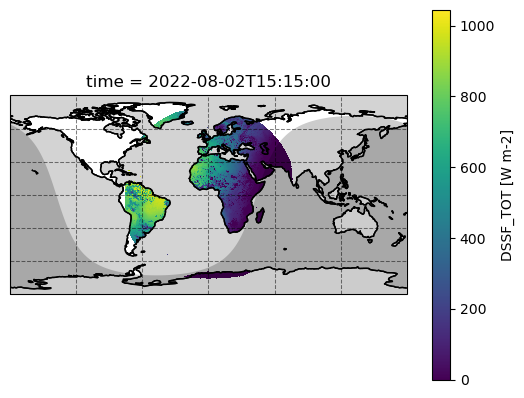

In [3]:
# Create a simple plots of the DSSF_TOT variable 

# to avoid showing warnings of cartopy
import warnings
warnings.filterwarnings('ignore')

pvar = ds.DSSF_TOT.isel(time=0)
#ax = plt.axes(projection=ccrs.Orthographic(0, 0))  # to use the Orthographic projection 
ax = plt.axes(projection=ccrs.PlateCarree())      # to use simple lat/lon 
pvar.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),interpolation='nearest')
ax.coastlines()
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.OCEAN, facecolor='lightgray')
ax.add_feature(Nightshade(slot, alpha=0.2))
ax.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=False)